In [56]:
pip install pandas numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import pandas as pd

In [58]:
df = pd.read_csv('C:/Users/Dona/Downloads/Admission_Prediction/data\Admission_Predict_Ver1.1.csv')

In [59]:
df.head()  # Display the first few rows of the DataFrame

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Breif about the Dataset
The given dataset is related to admission prediction using machine learning. The dataset includes the GRE(graduate record examination out of 340) Score, TOEFL(Test of English as a Foreign Language out of 120) Score, University Rating (1 to 5), Statement of Purpose (SOP, 1 to 5), Letter of Recommendation (LOR, 1 to 5), Undergraduate GPA (CGPA, on a scale of 10), Research experience (0=No, 1=Yes), and the Chance of Admit. The dataset consists of 400 rows and 9 columns , and the admission chance is a continuous value between 0 and 1(for classification), representing the probability of admission. The dataset is used to predict the chances of a student getting admitted to a university based on the provided features. The goal of this project is to use machine learning algorithms to analyze the data and predict the likelihood of admission for future students.

As per data we can observe few changes in the above data. GRE Score: 340 Total TOEFL Score: 120 Total University Rating: Out of 5 CGPA: Out of 10 Chance of Admit: if chance of admit>0.8 then Admission will be Completed else Admission Cannot be processed. To look around at it we will create another column "Chance of admit class" where it will be categorical value 0 or 1.

In [60]:
df['Chance of admit class']=df['Chance of Admit '].apply(lambda x:1 if x>0.80 else 0)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of admit class
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [61]:
## Shape of data
print(' Shape of Data \n Rows :',df.shape[0],', Columns : ',df.shape[1])

 Shape of Data 
 Rows : 500 , Columns :  10


In [62]:
## Checking for null values
missing_values = df.isnull().sum() * 100/len(df)
missing_values_df = pd.DataFrame({'Column_name':df.columns,'Missing_percent':missing_values})
missing_values_df

,Column_name,Missing_percent
Serial No.,Serial No.,0.0
GRE Score,GRE Score,0.0
TOEFL Score,TOEFL Score,0.0
University Rating,University Rating,0.0
SOP,SOP,0.0
LOR,LOR,0.0
CGPA,CGPA,0.0
Research,Research,0.0
Chance of Admit,Chance of Admit,0.0
Chance of admit class,Chance of admit class,0.0


In [63]:
#iNFORMATION ABOUT THE DATA we can observe data doesnot have any Null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Serial No.             500 non-null    int64  
 1   GRE Score              500 non-null    int64  
 2   TOEFL Score            500 non-null    int64  
 3   University Rating      500 non-null    int64  
 4   SOP                    500 non-null    float64
 5   LOR                    500 non-null    float64
 6   CGPA                   500 non-null    float64
 7   Research               500 non-null    int64  
 8   Chance of Admit        500 non-null    float64
 9   Chance of admit class  500 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 39.2 KB


In [64]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ',
       'Chance of admit class'],
      dtype='object')

In [65]:
#Cleaning the data
df.columns
df.drop('Serial No.',axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of admit class
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,0
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,0
4,314,103,2,2.0,3.0,8.21,0,0.65,0


In [66]:
#To check the correlation between the features, we can use the `corr()` method from pandas. 
#This will give us a correlation matrix which is the relationship between each pair of features in the DataFrame.
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of admit class
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351,0.668583
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228,0.684530
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132,0.639878
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137,0.590870
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365,0.512217
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413,0.730938
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871,0.477843
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000,0.751251
Chance of admit class,0.668583,0.684530,0.639878,0.590870,0.512217,0.730938,0.477843,0.751251,1.000000


From this above correlation matrix we can say that CGPA is affecting the chance of admit class strongly then TOEFL score and GRE score, rest shows less correlations.

In [67]:
# find the maximum value in the first row
max_value = df.iloc[0].max()
print('Maximum value in the first row:', max_value)

# find the minimum value in the first row
min_value = df.iloc[0].min()
print('Minimum value in the first row:', min_value)

Maximum value in the first row: 337.0
Minimum value in the first row: 0.92


Visualizations

Skewness of chance of admit :  -0.289966210041158


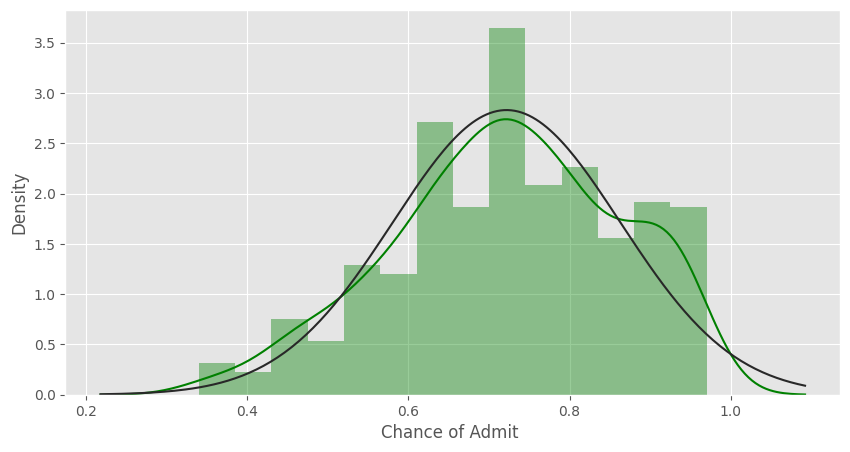

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
# lets see the distribution for the target variable
print('Skewness of chance of admit : ',df['Chance of Admit '].skew())
plt.figure(figsize = (10,5))
sns.distplot(df['Chance of Admit '],kde = True,color = 'g',fit = stats.norm)
plt.show()

Observations: We can see df[chance of admit] lies between -1 to 1 . Its value is :-0.29. We dont Require any transformations on the data.As it is kind of symmetric.

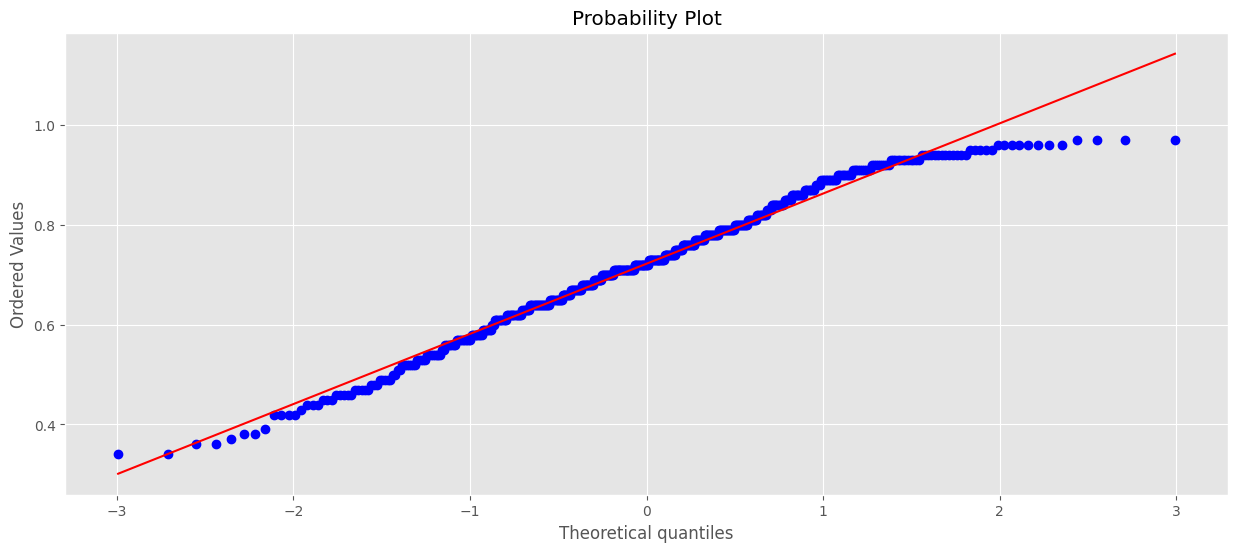

In [69]:
fig, ax = plt.subplots(figsize=(15,6))
rs = stats.probplot(df['Chance of Admit '],plot = ax)
plt.show()

This one will tell us about the data in best fit line. Where we can notice in the end data is kind of far from the line.

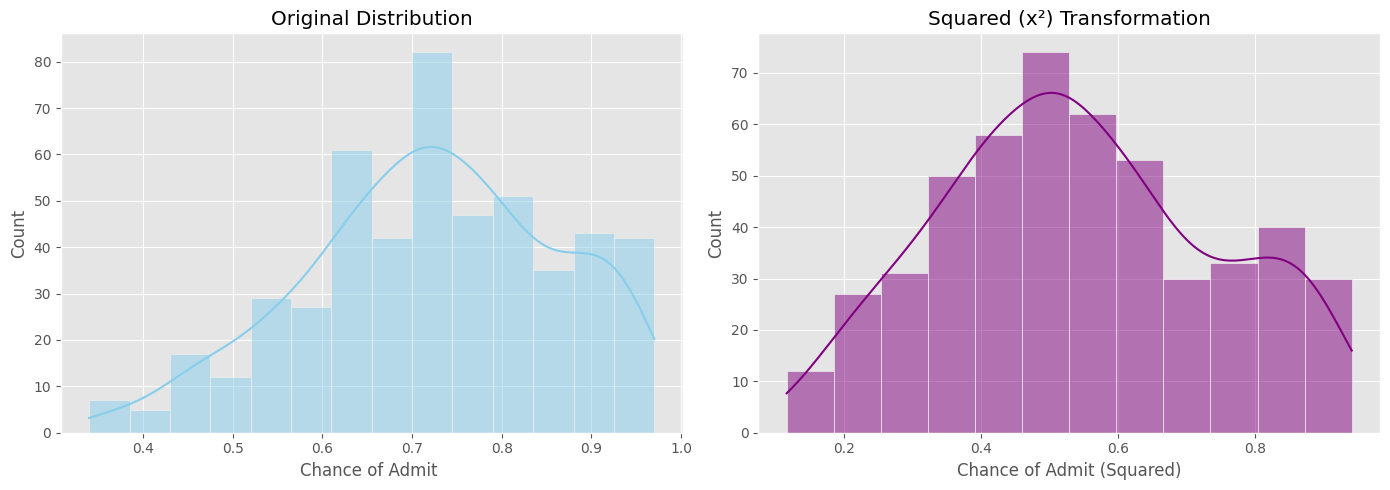

In [70]:
# Square transformation
df['Chance of Admit (Squared)'] = df['Chance of Admit '] ** 2

# Plot original vs squared
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
sns.histplot(df['Chance of Admit '], kde=True, color='skyblue')
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Chance of Admit (Squared)'], kde=True, color='purple')
plt.title('Squared (x²) Transformation')

plt.tight_layout()
plt.show()

In [71]:
Num_cols = df.columns[df.dtypes != 'object']
Cat_cols = df.columns[df.dtypes == 'object']
print (f"Numerical Columns = {Num_cols} /n Categorical Columns = {Cat_cols}")

Numerical Columns = Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'Chance of admit class',
       'Chance of Admit (Squared)'],
      dtype='object') /n Categorical Columns = Index([], dtype='object')


In [72]:
#Check for outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

# Check for all numeric columns
for col in Num_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")


GRE Score: 0 outliers
TOEFL Score: 0 outliers
University Rating: 0 outliers
SOP: 0 outliers
LOR : 1 outliers
CGPA: 0 outliers
Research: 0 outliers
Chance of Admit : 2 outliers
Chance of admit class: 0 outliers
Chance of Admit (Squared): 0 outliers


Linear Regression

In [73]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [74]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']
X = df[features]
y = df['Chance of Admit ']
y_class = df['Chance of admit class']

In [75]:
X = df[features]
y = df['Chance of Admit ']
y_class = df['Chance of admit class']
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)
trainX ,testX , trainY, testY = train_test_split(X, y, train_size = 0.7,random_state = 5) 

In [76]:
lin_reg = LinearRegression()
predY = lin_reg.fit(trainX,trainY).predict(testX)
m1 = r2_score(testY,predY)
print('Accuracy/RSquared : ',r2_score(testY, predY))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(testY,predY)))

Accuracy/RSquared :  0.7748446611568139
Root Mean Squared Error :  0.05966452891517707


Decision Tree Regressor

In [77]:
dec_tree = DecisionTreeRegressor()
predY = dec_tree.fit(trainX,trainY).predict(testX)
m2 = dec_tree.score(testX,testY)
print('Accuracy : ',dec_tree.score(testX, testY))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(testY,predY)))

Accuracy :  0.4067296340023613
Root Mean Squared Error :  0.096850400102426


Out of these two methods we can assume that accuracy level is better with Linear Regression.

Random Forest

In [78]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_c, Y_train_c)
y_pred_class = clf.predict(X_test_c)
print('Accuracy : ', accuracy_score(Y_test_c, y_pred_class))
print('Classification Report : \n', classification_report(Y_test_c, y_pred_class))

Accuracy :  0.96
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        73
           1       0.93      0.93      0.93        27

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100



We can say the model has performed very well on classifer model with 96% accuracy.
Upon seeing precision and recall we can say, no imbalance class problem is there.
F1 score balances precision and recall, model is balanced.
Macro and weighted average shows no biasness towards majority class, a reliable model.

In [79]:
reg = RandomForestRegressor(random_state=42)
reg.fit(trainX, trainY)
y_pred_reg = reg.predict(testX)
print('Accuracy/RSquared : ', r2_score(testY, y_pred_reg))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(testY, y_pred_reg)))

Accuracy/RSquared :  0.7236263956822402
Root Mean Squared Error :  0.06610333526633379


<Axes: >

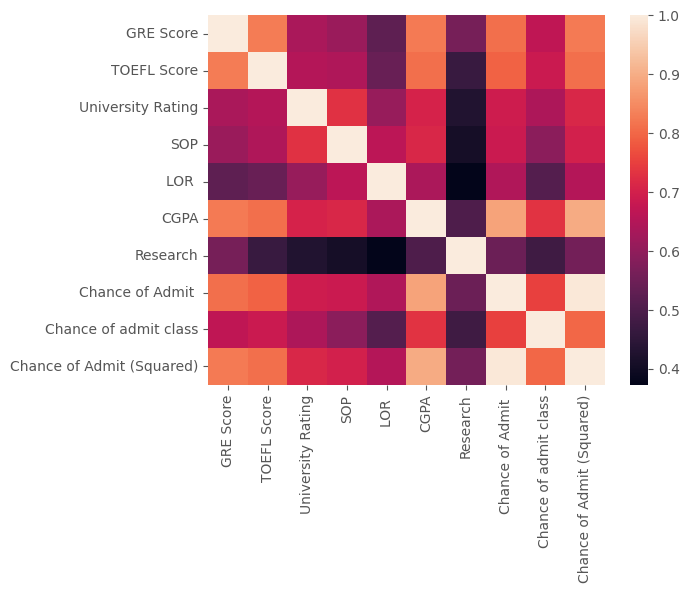

In [80]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Hyper parameter tuning of the classification model

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [82]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [83]:
# Initialize classifier
rf = RandomForestClassifier(random_state=42)

# Set up grid search
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

# Fit on training data
grid_search.fit(X_train_c, Y_train_c)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True, False], 'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [84]:
best_rf = grid_search.best_estimator_

# Predict on test data
y_pred_best = best_rf.predict(X_test_c)

# Print results
print("Best Parameters Found:")
print(grid_search.best_params_)

print("\n Classification Report (Tuned Model):")
print(classification_report(Y_test_c, y_pred_best))

print("Accuracy:", accuracy_score(Y_test_c, y_pred_best))

Best Parameters Found:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

 Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        73
           1       0.96      0.93      0.94        27

    accuracy                           0.97       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.97      0.97      0.97       100

Accuracy: 0.97


The accuracy score improved so the tuning was worth it.

<Axes: xlabel='value', ylabel='Feature'>

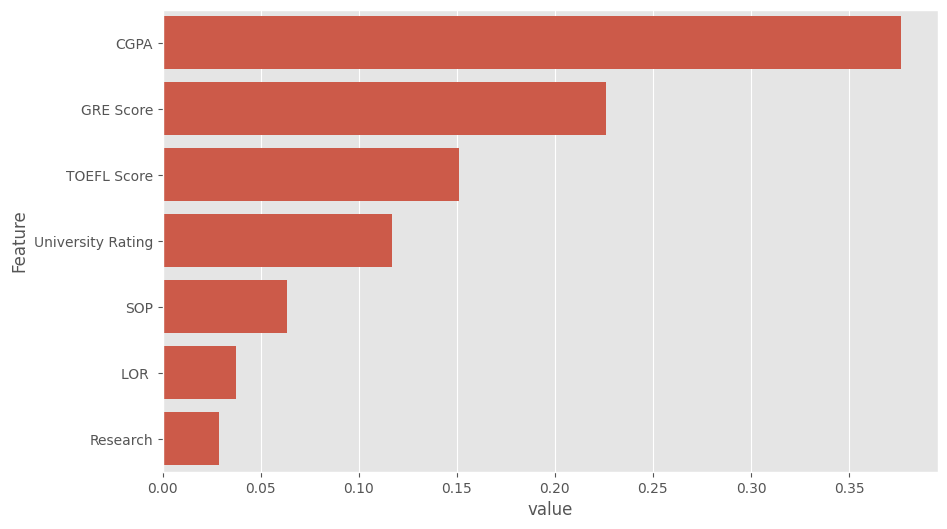

In [85]:
feature_importance = pd.DataFrame(sorted(zip(best_rf.feature_importances_, X.columns)), columns=['value','Feature'])
plt.figure(figsize=(10, 6)) 
sns.barplot(x="value", y="Feature", data=feature_importance.sort_values(by="value", ascending=False)) 

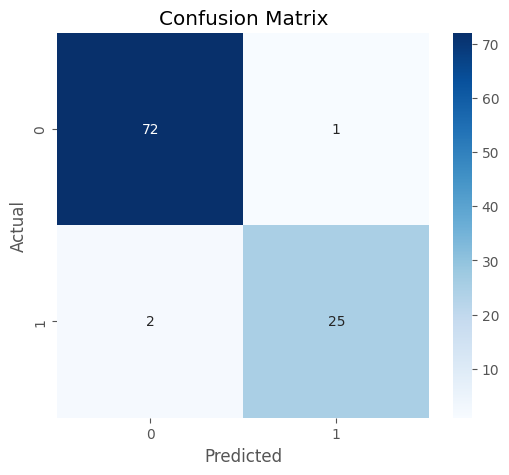

In [86]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test_c, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


A Quick Summary of Admission Prediction Model from the above Confusion Matrix

True Positive (TP = 25): Correctly predicted class 1 (admitted)
True Negative (TN = 75): Correctly predicted class 0 (not admitted)
False Positive (FP = 2): Predicted admitted, but actually not admitted
False Negative (FN = 1): Predicted not admitted, but actually admitted

1. Predicted both classes very well
2. Balanced Model
3. Can be trusted for real-world prediction of admission chances

In [87]:
# Save the model using pickle
import pickle

# Save the best tuned model
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

print("Model saved as 'random_forest_model.pkl'")

Model saved as 'random_forest_model.pkl'


In [88]:
# Load the model from file
with open("random_forest_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Use loaded model for prediction
y_pred_loaded = loaded_model.predict(testX)

# Confirm it's the same
from sklearn.metrics import accuracy_score
print("Accuracy from loaded model:", accuracy_score(Y_test_c, y_pred_best))

Accuracy from loaded model: 0.97


In [89]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
print(best_rf.feature_names_in_)


['GRE Score' 'TOEFL Score' 'University Rating' 'SOP' 'LOR ' 'CGPA'
 'Research']
